# Analysing coffee deals based on multiple factors
by Smahi

## Scope
- Filter out the data for coffee deals.
- Plot the coffee deals with respect to time.
- Also categorise the different coffees in the deal and visualise the unit sold.
- Which day was the most coffee deals sold.
- For each coffee type, which day was highest sale.

## Summary
- **Week 37** was the week with highest sales in terms of coffee deals.
- **76** coffee deals were sold on **16 & 30 Sep**.
- Below is the plot for coffee deals sold in different weeks of September.
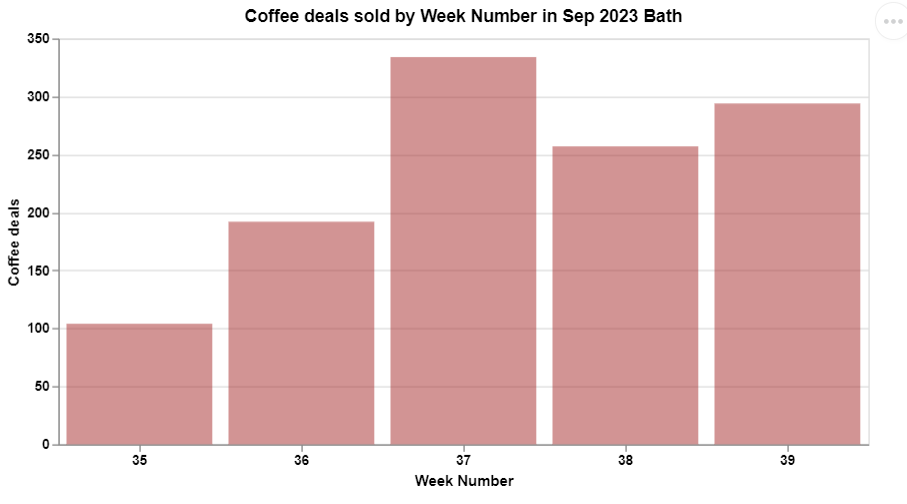
- Most sold coffee type was **Latte**, there were 19 units sold on **30 Sep**.
- **Saturdays** are the busiest, with **334** coffee deals sold, out of all days.
- Most popular coffee is **Flat white**, with a total of **233** cups sold.
- Below is plot for coffee deals sold on different days of the week.
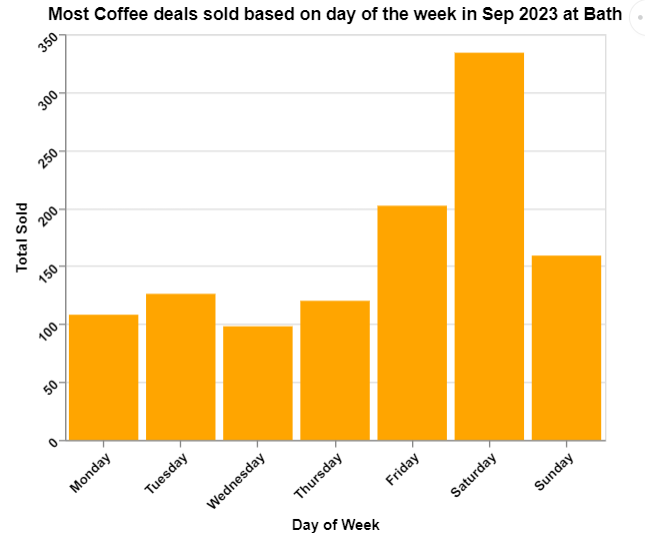
- Distribution of coffee deals sold throughout the month.
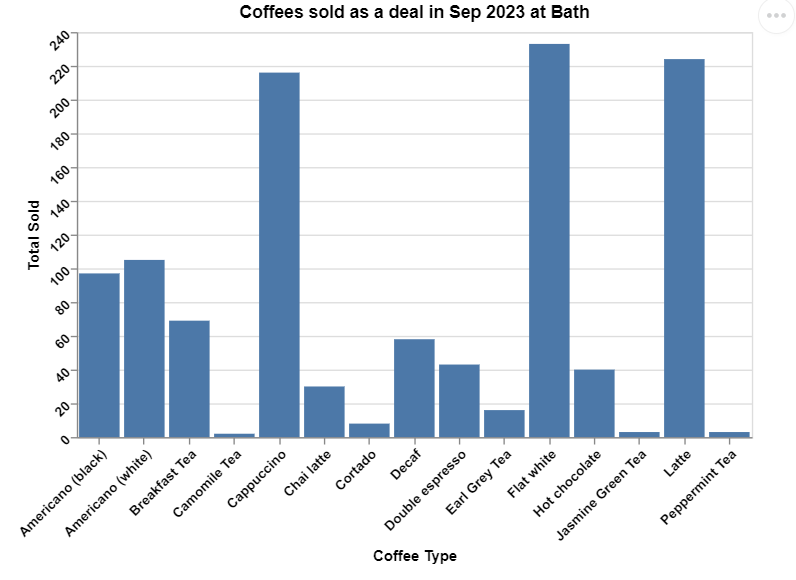
- Below is the plot for max of different coffees sold on day of the week.
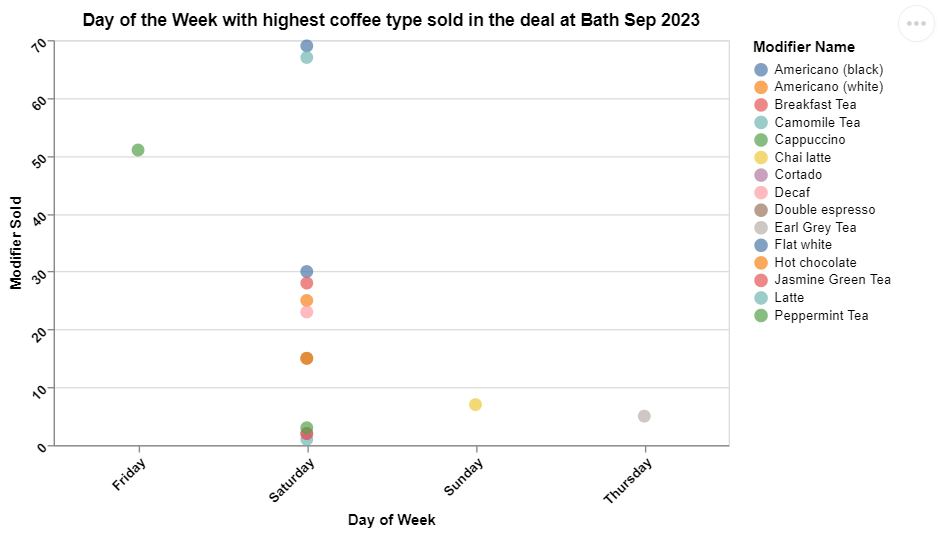

## Imports

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Read the excel file
df = pd.read_excel('output.xlsx')

In [3]:
# Fill the null values
df.fillna('',inplace=True)

In [4]:
# Preview
df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
0,2023-09-01,Pasteis de nata,,,,,,,,,,,,,,,,Friday,35
1,2023-09-01,,Pastel de Nata,582.2,457.28,284.0,0.0,,,,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
2,2023-09-01,Total (Pasteis de nata),,582.2,457.28,284.0,0.0,-,,0.0,-124.92,0.0,40.4,1.61,136.32,320.96,,Friday,35
3,2023-09-01,Coffee Deal,,,,,,,,,,,,,,,,Friday,35
4,2023-09-01,,Coffee & Pastel de Nata,196.8,196.8,48.0,0.0,,,,0.0,0.0,17.39,4.1,0.0,196.8,,Friday,35


In [5]:
# Filter out the coffee deals columns
deal = df[df['Category Name']=='Total (Coffee Deal)']

In [6]:
deal.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
18,2023-09-01,Total (Coffee Deal),,196.8,196.8,48.0,0.0,-,50.0,0.0,0.0,0.0,17.39,4.1,0.0,196.8,,Friday,35
125,2023-09-02,Total (Coffee Deal),,230.3,225.38,56.0,0.0,-,56.0,0.7,-4.92,0.0,14.93,4.02,0.0,225.38,,Saturday,35
218,2023-09-03,Total (Coffee Deal),,147.6,145.14,36.0,0.0,-,36.0,0.0,-2.46,0.0,14.69,4.03,0.0,145.14,,Sunday,36
307,2023-09-04,Total (Coffee Deal),,77.9,77.9,19.0,0.0,-,18.0,0.0,0.0,0.0,13.17,4.1,0.0,77.9,,Monday,36
378,2023-09-05,Total (Coffee Deal),,98.4,97.17,24.0,0.0,-,17.0,0.0,-1.23,0.0,14.85,4.05,0.0,97.17,0.0,Tuesday,36


In [7]:
# Check size of the filtered data
deal.shape

(30, 19)

### Which day most coffee deals were sold


In [8]:
# Find the maximum "Sold" value
max_sold_value = deal['Sold'].max()

# Filter the DataFrame to get the row(s) with the maximum "Modifier Sold" value
rows_with_max_sold = deal[deal['Sold'] == max_sold_value]

In [9]:
rows_with_max_sold

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
1267,2023-09-16,Total (Coffee Deal),,311.6,302.58,76.0,2.0,-,83.0,0.0,-0.82,-8.2,15.36,4.09,0.0,302.58,,Saturday,37
2451,2023-09-30,Total (Coffee Deal),,313.7,312.88,76.0,0.0,-,89.0,2.1,-0.82,0.0,15.28,4.12,0.0,312.88,,Saturday,39


### Which week most coffee deals were sold

In [10]:
# Group the data based on week number 
deal_week = deal.groupby(['Week Number','Category Name'])['Sold'].sum().reset_index()

In [11]:
deal_week

,Week Number,Category Name,Sold
0,35,Total (Coffee Deal),104.0
1,36,Total (Coffee Deal),192.0
2,37,Total (Coffee Deal),334.0
3,38,Total (Coffee Deal),257.0
4,39,Total (Coffee Deal),294.0


In [12]:
# Visualise the chart
deal_week_chart = alt.Chart(deal_week).mark_bar(color='brown',opacity=0.5).encode(
    x=alt.X('Week Number:N', axis=alt.Axis(labelFontWeight='bold',labelAngle=0)),
    y=alt.Y('Sold:Q', title = 'Coffee deals',axis = alt.Axis(labelFontWeight='bold')),
    tooltip=['Week Number:N', 'Sold:Q']
).properties(
    width=600,
    title='Coffee deals sold by Week Number in Sep 2023 Bath'
)

In [13]:
deal_week_chart

alt.Chart(...)

In [14]:
# Filter the category
values_to_filter = [
    'Americano (white)',
    'Americano (black)',
    'Latte',
    'Cappuccino',
    'Flat white',
    'Double espresso',
    'Hot chocolate',
    'Cortado',
    'Chai latte',
    'Breakfast Tea',
    'Earl Grey Tea',
    'Camomile Tea',
    'Jasmine Green Tea',
    'Peppermint Tea',
    'Decaf'
]

In [15]:
# Filter all the coffee types
coffee_df = df[df['Modifier Name'].isin(values_to_filter)]

In [16]:
# Check size
coffee_df.shape

(272, 19)

In [17]:
# Preview
coffee_df.head()

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
5,2023-09-01,,,,,,,Americano (white),5.0,0.0,,,,,,,,Friday,35
6,2023-09-01,,,,,,,Americano (black),2.0,0.0,,,,,,,,Friday,35
7,2023-09-01,,,,,,,Latte,7.0,0.0,,,,,,,,Friday,35
8,2023-09-01,,,,,,,Cappuccino,15.0,0.0,,,,,,,,Friday,35
9,2023-09-01,,,,,,,Flat white,8.0,0.0,,,,,,,,Friday,35


In [18]:
# Most sold coffee deal
coffee_df.sort_values(by='Modifier Sold',ascending=False).iloc[0]

Date               2023-09-30 00:00:00
Category Name                         
Name                                  
Gross Sales                           
Net Sales                             
Sold                                  
Refunded                              
Modifier Name                    Latte
Modifier Sold                     19.0
Modifier Amount                    0.0
Discounts                             
Refunds                               
% Net Sales                           
Avg Item Size                         
COGS                                  
Gross Profit                          
Repayments                            
Day of Week                   Saturday
Week Number                         39
Name: 2436, dtype: object

In [19]:
# Filter the data for week 37
week_37_data = coffee_df[coffee_df['Week Number'] == 37]

In [20]:
week_37_data

,Date,Category Name,Name,Gross Sales,Net Sales,Sold,Refunded,Modifier Name,Modifier Sold,Modifier Amount,Discounts,Refunds,% Net Sales,Avg Item Size,COGS,Gross Profit,Repayments,Day of Week,Week Number
758,2023-09-10,,,,,,,Americano (white),3.0,0.0,,,,,,,,Sunday,37
759,2023-09-10,,,,,,,Americano (black),2.0,0.0,,,,,,,,Sunday,37
760,2023-09-10,,,,,,,Latte,12.0,0.0,,,,,,,,Sunday,37
761,2023-09-10,,,,,,,Cappuccino,12.0,0.0,,,,,,,,Sunday,37
762,2023-09-10,,,,,,,Flat white,10.0,0.0,,,,,,,,Sunday,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2023-09-16,,,,,,,Breakfast Tea,10.0,0.0,,,,,,,,Saturday,37
1264,2023-09-16,,,,,,,Peppermint Tea,1.0,0.0,,,,,,,,Saturday,37
1265,2023-09-16,,,,,,,Decaf,4.0,0.0,,,,,,,,Saturday,37
1285,2023-09-16,,,,,,,Decaf,1.0,0.0,,,,,,,,Saturday,37


In [21]:
# Find the coffee deal with the highest sales in week 37
most_sold_deal = week_37_data.sort_values(by='Modifier Sold', ascending=False).iloc[0]


In [22]:
most_sold_deal

Date               2023-09-15 00:00:00
Category Name                         
Name                                  
Gross Sales                           
Net Sales                             
Sold                                  
Refunded                              
Modifier Name               Cappuccino
Modifier Sold                     19.0
Modifier Amount                    0.0
Discounts                             
Refunds                               
% Net Sales                           
Avg Item Size                         
COGS                                  
Gross Profit                          
Repayments                            
Day of Week                     Friday
Week Number                         37
Name: 1176, dtype: object

### Which day of the week most coffee deals are sold

In [23]:
# Group the data based on day of the week
deal_day = coffee_df.groupby('Day of Week')['Modifier Sold'].sum().reset_index()

In [24]:
# Sort the values
deal_day = deal_day.sort_values(by='Modifier Sold', ascending=False)

In [25]:
deal_day

,Day of Week,Modifier Sold
2,Saturday,334.0
0,Friday,202.0
3,Sunday,159.0
5,Tuesday,126.0
4,Thursday,120.0
1,Monday,108.0
6,Wednesday,98.0


In [26]:
# Visualise the above table
day_chart = alt.Chart(deal_day).mark_bar(color='orange').encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45),
           sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    y=alt.Y('Modifier Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
).properties(
    width = 400,
    title='Most Coffee deals sold based on day of the week in Sep 2023 at Bath'
)

In [27]:
day_chart

alt.Chart(...)

In [28]:
# Group data based on type of coffee
deal_type = coffee_df.groupby('Modifier Name')['Modifier Sold'].sum().reset_index()

In [29]:
# Sort it
deal_type = deal_type.sort_values(by='Modifier Sold', ascending=False)

In [30]:
deal_type

,Modifier Name,Modifier Sold
10,Flat white,233.0
13,Latte,224.0
4,Cappuccino,216.0
1,Americano (white),105.0
0,Americano (black),97.0
2,Breakfast Tea,69.0
7,Decaf,58.0
8,Double espresso,43.0
11,Hot chocolate,40.0
5,Chai latte,30.0


In [31]:
# Visualise the above table
chart = alt.Chart(deal_type).mark_bar().encode(
    x=alt.X('Modifier Name:N', title='Coffee Type',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Modifier Sold:Q', title='Total Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
).properties(
    width = 500,
    title='Coffees sold as a deal in Sep 2023 at Bath'
)

In [32]:
chart

alt.Chart(...)

### Figure out which day of the week specific coffee deals are sold

In [33]:
# For each coffee type, find out which day was highest sale
grouped_data = coffee_df.groupby(['Day of Week', 'Modifier Name'])['Modifier Sold'].sum().reset_index()

In [34]:
grouped_data

,Day of Week,Modifier Name,Modifier Sold
0,Friday,Americano (black),18.0
1,Friday,Americano (white),18.0
2,Friday,Breakfast Tea,8.0
3,Friday,Cappuccino,51.0
4,Friday,Chai latte,4.0
...,...,...,...
80,Wednesday,Decaf,2.0
81,Wednesday,Double espresso,1.0
82,Wednesday,Flat white,18.0
83,Wednesday,Hot chocolate,1.0


In [35]:
# Find the day of the week with the highest total sold for each modifier
max_sold_by_modifier = grouped_data.groupby('Modifier Name')['Modifier Sold'].idxmax()

In [36]:
max_sold_by_modifier

Modifier Name
Americano (black)    23
Americano (white)    24
Breakfast Tea        25
Camomile Tea         26
Cappuccino            3
Chai latte           43
Cortado              29
Decaf                30
Double espresso      31
Earl Grey Tea        59
Flat white           33
Hot chocolate        34
Jasmine Green Tea    35
Latte                36
Peppermint Tea       37
Name: Modifier Sold, dtype: int64

In [37]:
# Filter the grouped data to get the day of the week with the highest sales for each modifier
best_days = grouped_data.loc[max_sold_by_modifier]

In [38]:
best_days

,Day of Week,Modifier Name,Modifier Sold
23,Saturday,Americano (black),30.0
24,Saturday,Americano (white),25.0
25,Saturday,Breakfast Tea,28.0
26,Saturday,Camomile Tea,1.0
3,Friday,Cappuccino,51.0
43,Sunday,Chai latte,7.0
29,Saturday,Cortado,2.0
30,Saturday,Decaf,23.0
31,Saturday,Double espresso,15.0
59,Thursday,Earl Grey Tea,5.0


In [39]:
# Create a scatter plot using Altair
chart = alt.Chart(best_days).mark_circle(size=90).encode(
    x=alt.X('Day of Week:N', title='Day of Week',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    y=alt.Y('Modifier Sold:Q', title='Modifier Sold',axis=alt.Axis(labelFontWeight='bold',labelAngle=-45)),
    color=alt.Color('Modifier Name:N', title='Modifier Name'),
    tooltip=['Day of Week', 'Modifier Name', 'Modifier Sold']
).properties(
    width = 500,
    title='Day of the Week with highest coffee type sold in the deal at Bath Sep 2023'
)

# Show the chart
chart

alt.Chart(...)